# 1.1

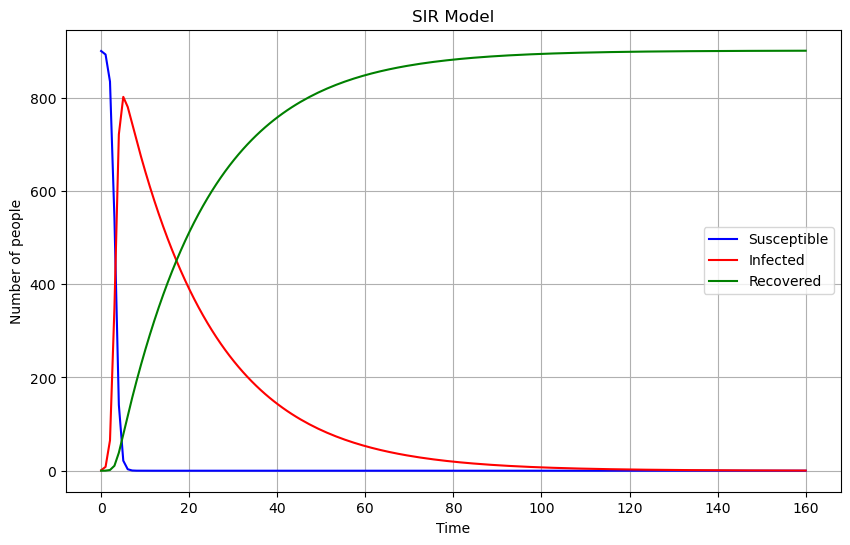

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


def saveable(title: str) -> str:
    return title.replace(" ", "_") + ".png"


def plot_sir():
    # Parameters
    beta = 2.4  # infection rate
    gamma = 1.0 / 20.0  # recovery rate
    N = 1000  # total population

    # Initial conditions: S, I, R
    S0 = 0.9 * N
    I0 = 1
    R0 = 0
    initial_conditions = [S0, I0, R0]

    # Time points (days)
    t = np.linspace(0, 160, 160)

    # SIR model equations
    def sir_model(y, t, beta, gamma, N):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return [dSdt, dIdt, dRdt]

    # Solving the SIR model
    solution = odeint(sir_model, initial_conditions, t, args=(beta, gamma, N))
    S, I, R = solution.T

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(t, S, label="Susceptible", color="blue")
    plt.plot(t, I, label="Infected", color="red")
    plt.plot(t, R, label="Recovered", color="green")
    plt.xlabel("Time")
    plt.ylabel("Number of people")
    title = "SIR Model"
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.savefig(saveable(title))


plot_sir()

# 1.2

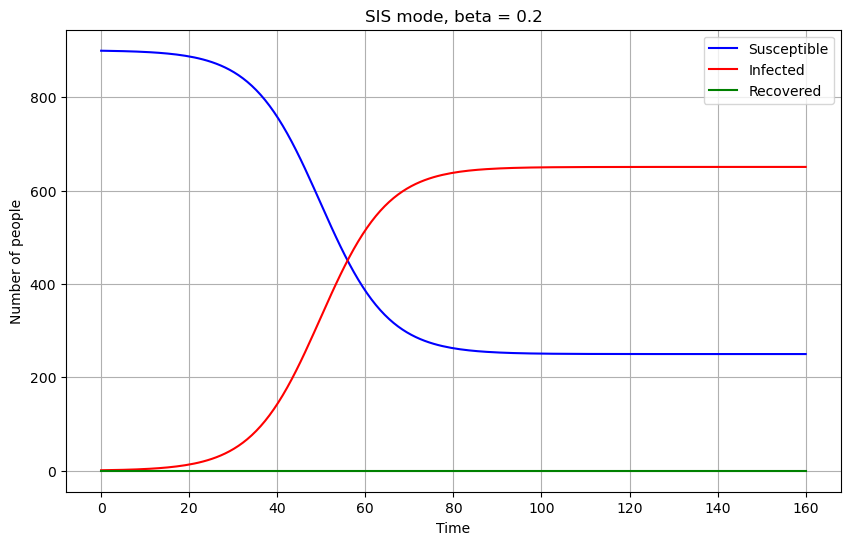

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


def plot_sis(beta=0.2, gamma=1 / 20, N=1000):

    # Initial conditions: S, I, R
    S0 = 0.9 * N
    I0 = 1
    R0 = 0
    initial_conditions = [S0, I0, R0]

    # Time points (days)
    t = np.linspace(0, 160, 160)

    # SIR model equations
    def sir_model(y, t, beta, gamma, N):
        S, I, R = y
        dSdt = -beta * S * I / N + gamma * I
        dIdt = beta * S * I / N - gamma * I
        dRdt = 0
        return [dSdt, dIdt, dRdt]

    # Solving the SIR model
    solution = odeint(sir_model, initial_conditions, t, args=(beta, gamma, N))
    S, I, R = solution.T

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(t, S, label="Susceptible", color="blue")
    plt.plot(t, I, label="Infected", color="red")
    plt.plot(t, R, label="Recovered", color="green")
    plt.xlabel("Time")
    plt.ylabel("Number of people")
    title = "SIS mode"
    plt.title(f"{title}, beta = {beta}")
    plt.legend()
    plt.grid()
    plt.savefig(saveable(title))


plot_sis()

Two types of long term behaviour:
- $\beta<\gamma$, disease-free equilibrium ($I$ approaches zero)
- $\gamma<\beta$, endemic equilibrium (on the plot)

# 1.3

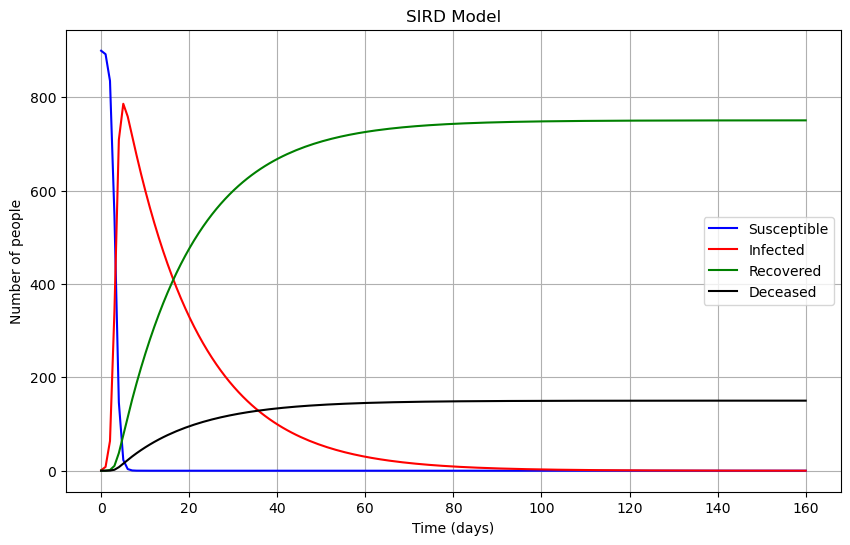

In [28]:


def plot_sird():
    # Mortality rate
    delta = 0.01  # mortality rate for infected individuals

    # SIRD model equations (with mortality)
    def sird_model(y, t, beta, gamma, delta, N):
        S, I, R, D = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I - delta * I
        dRdt = gamma * I
        dDdt = delta * I
        return [dSdt, dIdt, dRdt, dDdt]

    # Initial conditions for SIRD model (S, I, R, D)
    N = 1000
    S0 = 0.9 * N
    I0 = 1
    R0 = 0
    initial_conditions_sird = [S0, I0, R0, 0]  # initial deceased count is zero
    t = np.linspace(0, 160, 160)
    beta = 2.4  # infection rate
    gamma = 1.0 / 20.0  # recovery rate

    # Solving the SIRD model
    solution_sird = odeint(
        sird_model, initial_conditions_sird, t, args=(beta, gamma, delta, N)
    )
    S_sird, I_sird, R_sird, D_sird = solution_sird.T

    # Plotting the SIRD results
    plt.figure(figsize=(10, 6))
    plt.plot(t, S_sird, label="Susceptible", color="blue")
    plt.plot(t, I_sird, label="Infected", color="red")
    plt.plot(t, R_sird, label="Recovered", color="green")
    plt.plot(t, D_sird, label="Deceased", color="black")
    plt.xlabel("Time (days)")
    plt.ylabel("Number of people")
    title = "SIRD Model"
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.savefig(saveable(title))


plot_sird()

# 4

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def plot_matrix(A, ic, title=""):
    # Define the matrix A and the system of ODEs
    A = np.array(A)

    def linear_ode_system(t, x):
        return A @ x

    # Time span and initial condition for solving the ODE
    t_span = (0, 100)
    t_eval = np.linspace(*t_span, 2000)
    initial_condition = np.array(ic)

    # Solve the ODE for the single initial condition
    solution = solve_ivp(linear_ode_system, t_span, initial_condition, t_eval=t_eval)

    # --- Plot: Phase Portrait (x1 vs x2) and Flow Field ---
    # Generate a grid for the flow field
    x1_vals = np.linspace(-2, 2, 20)
    x2_vals = np.linspace(-2, 2, 20)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    U = A[0, 0] * X1 + A[0, 1] * X2  # x1' component of the vector field
    V = A[1, 0] * X1 + A[1, 1] * X2  # x2' component of the vector field

    plt.figure(figsize=(8, 8))
    plt.quiver(X1, X2, U, V, color="blue", alpha=0.5)
    plt.plot(solution.y[0], solution.y[1], color="red", label="Trajectory")
    plt.scatter(
        initial_condition[0],
        initial_condition[1],
        color="black",
        label="Initial Condition",
    )
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.title(title + f" A={A}")
    plt.legend()
    plt.grid()
    filename = title.replace(" ", "_") + ".png"
    plt.savefig(filename)

# 4.2, 4.3

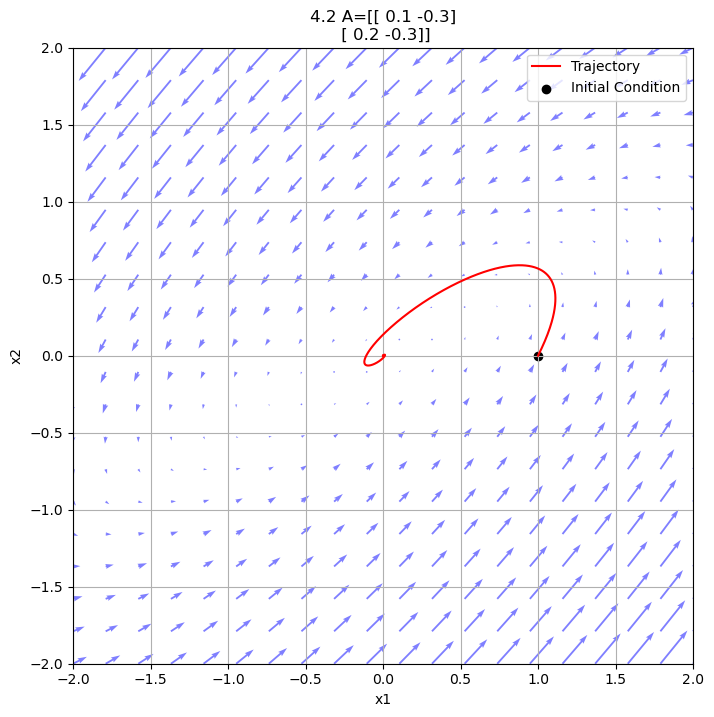

In [30]:
plot_matrix([[0.1, -0.3], [0.2, -0.3]], ic=[1, 0], title="4.2")

# 4.4

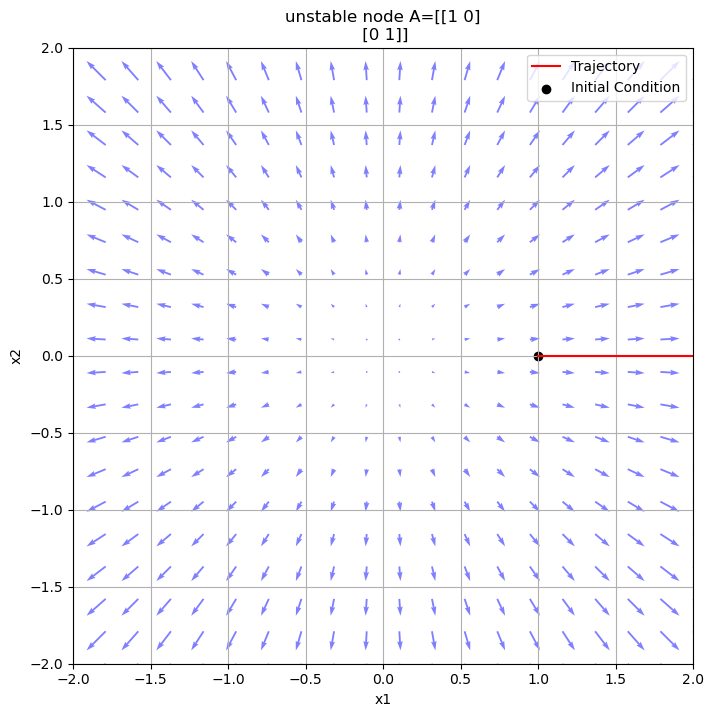

In [31]:
plot_matrix([[1, 0], [0, 1]], ic=[1, 0], title="unstable node")

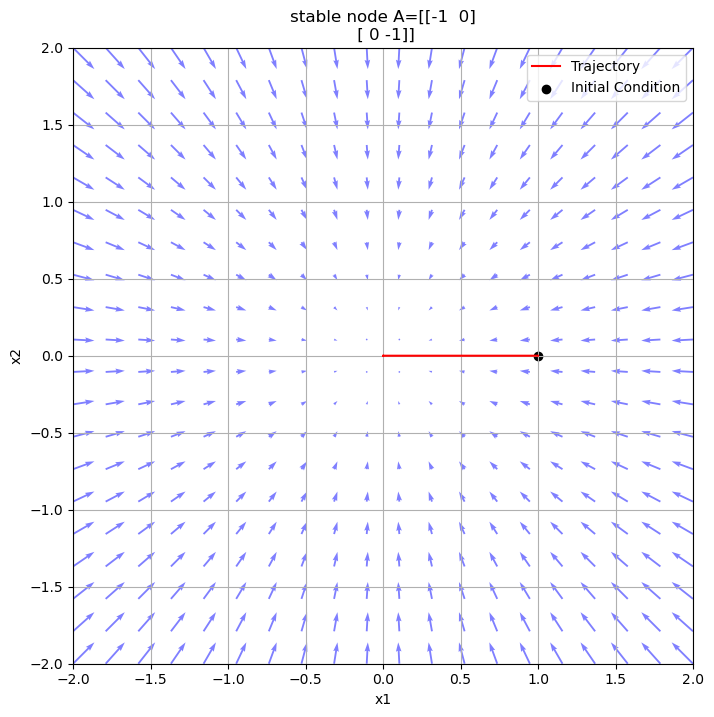

In [32]:
plot_matrix([[-1, 0], [0, -1]], ic=[1, 0], title="stable node")

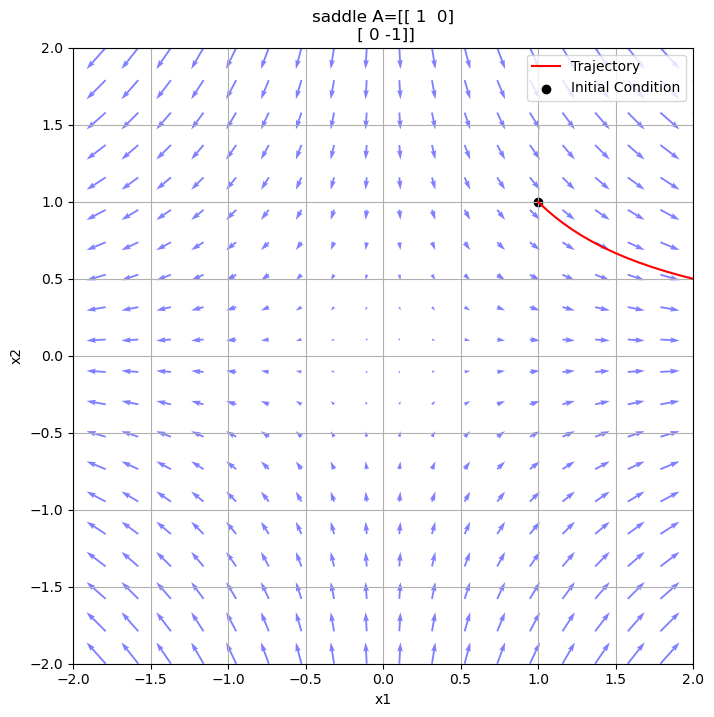

In [33]:
plot_matrix([[1, 0], [0, -1]], ic=[1, 1], title="saddle")

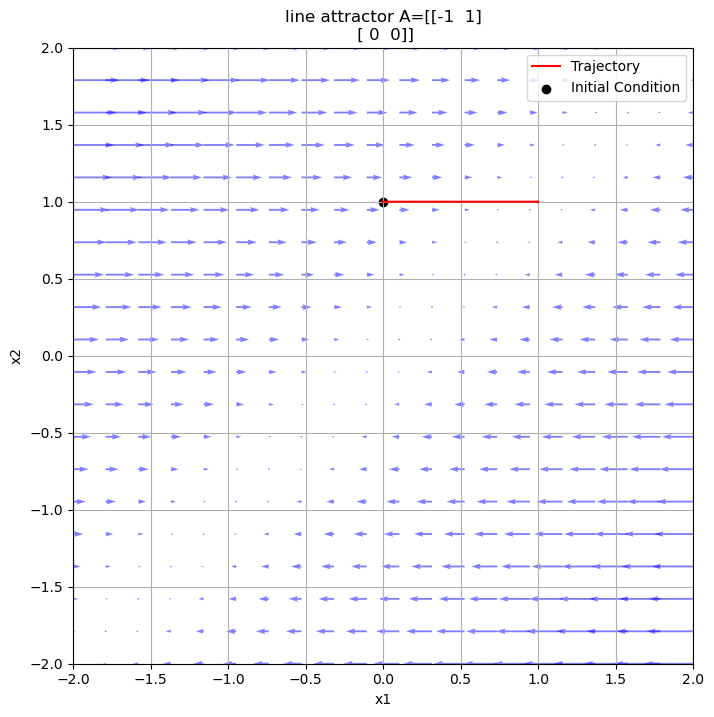

In [34]:
plot_matrix([[-1, 1], [0, 0]], ic=[0, 1], title="line attractor")

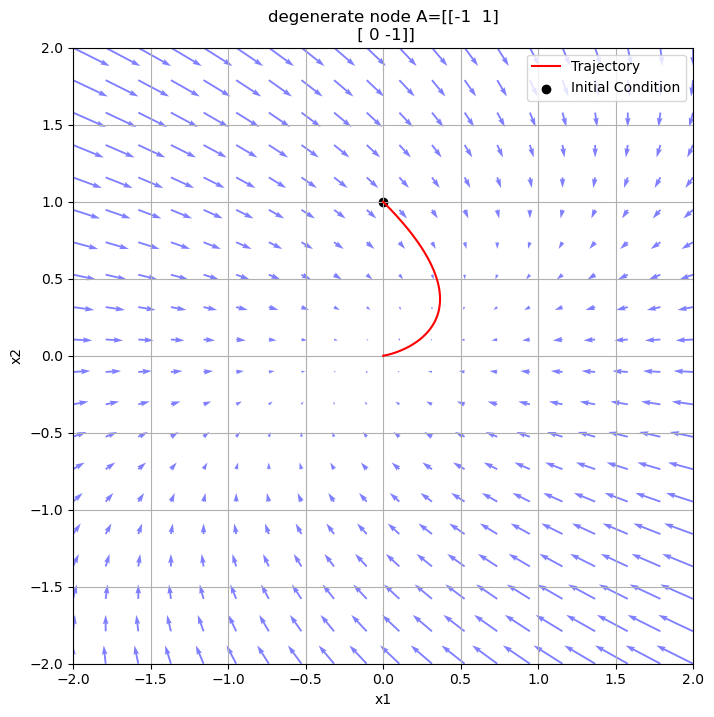

In [35]:
plot_matrix([[-1, 1], [0, -1]], ic=[0, 1], title="degenerate node")

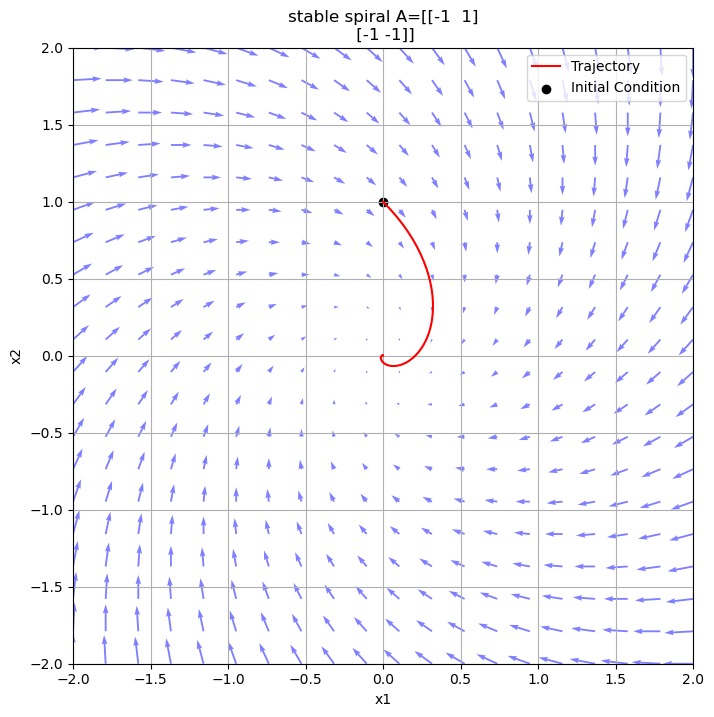

In [36]:
plot_matrix([[-1, 1], [-1, -1]], ic=[0, 1], title="stable spiral")

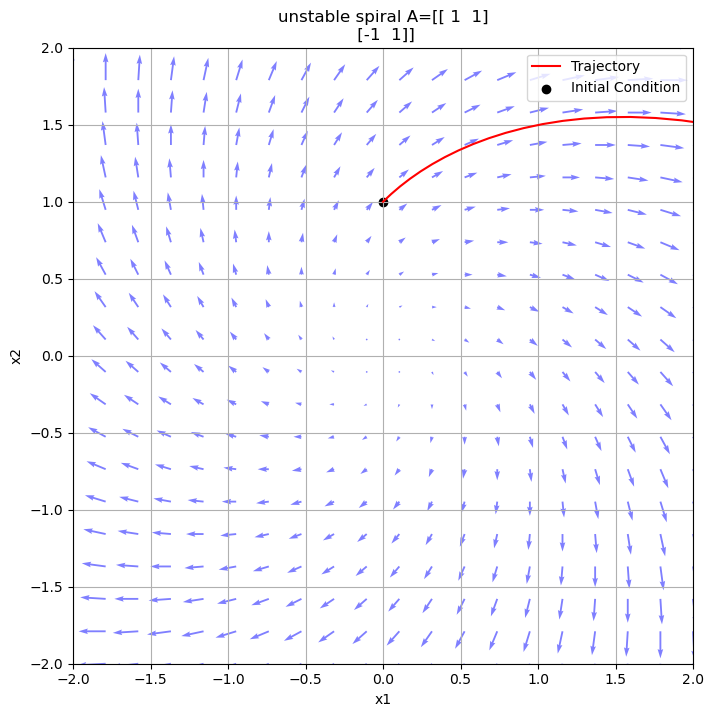

In [37]:
plot_matrix([[1, 1], [-1, 1]], ic=[0, 1], title="unstable spiral")

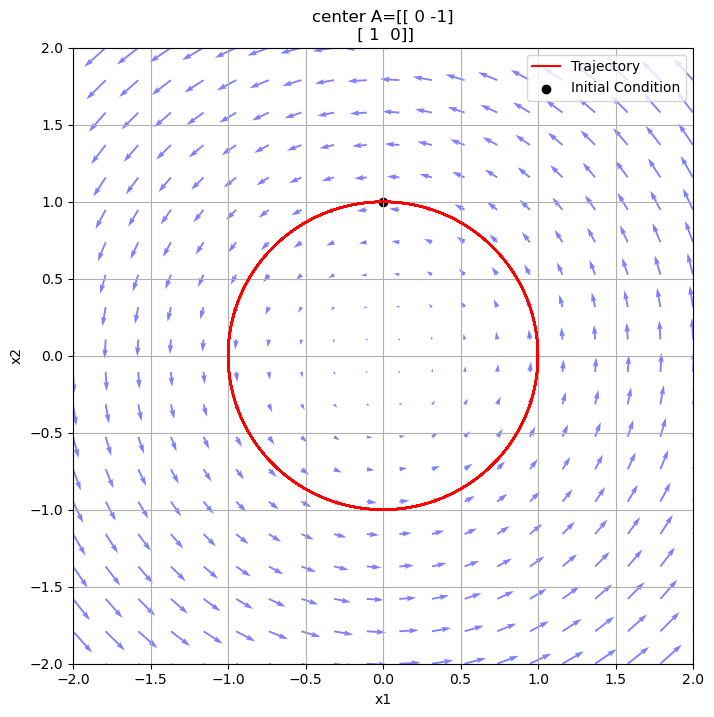

In [38]:
plot_matrix([[0, -1], [1, 0]], ic=[0, 1], title="center")